[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jacmantooth/CSE_40838_Final_Project/blob/main/baseballwebscraping%20(1).ipynb#scrollTo=6pOuEWe0hSYr)

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup, Comment
from io import StringIO
from IPython.display import HTML,display, clear_output
try:
  from fake_useragent import UserAgent
except:
  !pip install fake_useragent
  from fake_useragent import UserAgent

import matplotlib.pyplot as plt
from ipywidgets import widgets, Output,interact, FloatSlider
import matplotlib.animation as animation
import random
import time
import ipywidgets as widgets
from IPython.display import Image
import os 
import numpy as np

# Building Data Set

In [3]:
def getdata():
    '''
    This function scrapes team standings data from Baseball-Reference.com for MLB teams
    from the years 2000 to 2023. The data is extracted from HTML tables embedded in the
    website's comments, processed, and compiled into a Pandas DataFrame. The resulting 
    DataFrame can be exported as a CSV file and used for generating visualizations and 
    performing data analysis.
    '''
    # Generate a list of user-agent strings for simulating different browsers to avoid being blocked
    ua = UserAgent(browsers=['edge', 'chrome'])
    ua.random
    user_agents = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Edge/90.0.818.56',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:85.0) Gecko/20100101 Firefox/85.0',
        # Additional user-agent strings for variety
    ]

    # Iterate over the range of years from 2000 to 2023
    for yearnum in range(2000, 2024):
        # Construct the URL for the standings page of the given year
        url = f'https://www.baseball-reference.com/leagues/majors/{yearnum}-standings.shtml#expanded_standings_overall'
        
        # Randomly select a user-agent to include in the request headers
        headers = {'User-Agent': random.choice(user_agents)}

        # Send an HTTP GET request to fetch the web page
        response = requests.get(url, headers=headers)

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Baseball-Reference often places tables within HTML comments.
        # Extract all comments from the page (this includes hidden HTML content).
        comments = soup.find_all(string=lambda text: isinstance(text, Comment))

        # Initialize a variable to store the HTML of the desired table
        table_html = None

        # Search through the comments for the specific table containing team standings
        for comment in comments:
            if 'expanded_standings_overall' in comment:
                table_html = comment  # Found the table HTML
                break
        
        # Convert the extracted comment containing the table into a StringIO object
        table_io = StringIO(table_html)

        # Use pandas to read the HTML table from the StringIO object
        tables = pd.read_html(table_io)

        # Extract the first table from the list of parsed tables
        truetable = tables[0]

        # Drop an unnecessary row (assumed to be row 30, adjust index as needed)
        truetable = truetable.drop([30], axis=0)

        # Add a column for the year to differentiate data across seasons
        truetable['Year'] = yearnum

        # Merge the current year's table with the accumulated DataFrame
        if yearnum == 2000:
            df1 = truetable  # Initialize the DataFrame with data from the first year
        else:
            df2 = truetable  # Current year's table
            df1 = pd.concat([df1, df2], ignore_index=True)  # Append to the existing DataFrame
        
        # Introduce a random delay between requests to avoid getting blocked by the server
        time.sleep(random.uniform(1, 3))
    
    # Return the compiled DataFrame containing standings data from all years
    return df1


In [4]:
# Path to the file
file_path = "/Users/jacobmantooth/truetable.csv"

# Check if the file exists
if os.path.exists(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
else:
    data = getdata()
    print("File not found. No action taken.")

Dataset loaded successfully!


# Messing around with data set 

In [5]:
data

,Rk,Tm,W,L,W-L%,R,RA,Rdiff,SOS,SRS,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,1.0,San Francisco Giants,97,65,0.599,5.7,4.6,1.1,-0.1,1.0,...,8-7,55-26,42-39,7-5,18-22,78-45,19-20,43-42,54-23,2000
1,2.0,Atlanta Braves,95,67,0.586,5.0,4.4,0.6,-0.2,0.4,...,11-7,51-30,44-37,3-5,18-18,74-53,21-14,42-33,53-34,2000
2,3.0,St. Louis Cardinals,95,67,0.586,5.5,4.8,0.7,-0.1,0.6,...,7-8,50-31,45-36,5-2,28-16,78-44,17-23,33-37,62-30,2000
3,4.0,Chicago White Sox,95,67,0.586,6.0,5.2,0.9,0.0,0.9,...,12-6,46-35,49-32,7-4,28-18,74-57,21-10,49-35,46-32,2000
4,5.0,New York Mets,94,68,0.580,5.0,4.6,0.4,-0.1,0.3,...,9-9,55-26,39-42,10-8,29-20,76-55,18-13,42-36,52-32,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,26.0,Washington Nationals,71,91,0.438,4.3,5.2,-0.9,0.1,-0.8,...,23-23,34-47,37-44,6-2,28-21,47-60,24-31,39-63,32-28,2023
716,27.0,Chicago White Sox,61,101,0.377,4.0,5.2,-1.2,0.0,-1.3,...,15-31,31-50,30-51,5-11,19-30,47-77,14-24,26-59,35-42,2023
717,28.0,Colorado Rockies,59,103,0.364,4.5,5.9,-1.5,0.1,-1.3,...,18-28,37-44,22-59,6-4,23-24,37-74,22-29,31-72,28-31,2023
718,29.0,Kansas City Royals,56,106,0.346,4.2,5.3,-1.1,0.0,-1.2,...,16-30,33-48,23-58,3-4,21-20,42-79,14-27,25-60,31-46,2023


In [6]:
df_2000 = data[data['Year'] == 2000]
df_2000

,Rk,Tm,W,L,W-L%,R,RA,Rdiff,SOS,SRS,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,1.0,San Francisco Giants,97,65,0.599,5.7,4.6,1.1,-0.1,1.0,...,8-7,55-26,42-39,7-5,18-22,78-45,19-20,43-42,54-23,2000
1,2.0,Atlanta Braves,95,67,0.586,5.0,4.4,0.6,-0.2,0.4,...,11-7,51-30,44-37,3-5,18-18,74-53,21-14,42-33,53-34,2000
2,3.0,St. Louis Cardinals,95,67,0.586,5.5,4.8,0.7,-0.1,0.6,...,7-8,50-31,45-36,5-2,28-16,78-44,17-23,33-37,62-30,2000
3,4.0,Chicago White Sox,95,67,0.586,6.0,5.2,0.9,0.0,0.9,...,12-6,46-35,49-32,7-4,28-18,74-57,21-10,49-35,46-32,2000
4,5.0,New York Mets,94,68,0.580,5.0,4.6,0.4,-0.1,0.3,...,9-9,55-26,39-42,10-8,29-20,76-55,18-13,42-36,52-32,2000
5,6.0,Oakland Athletics,91,70,0.565,5.9,5.0,0.8,0.1,0.9,...,11-7,47-34,44-36,8-5,21-19,70-44,21-26,49-42,42-28,2000
6,7.0,Seattle Mariners,91,71,0.562,5.6,4.8,0.8,0.0,0.8,...,11-7,47-34,44-37,3-4,15-22,71-60,20-11,46-43,45-28,2000
7,8.0,Cleveland Indians,90,72,0.556,5.9,5.0,0.8,0.0,0.9,...,13-5,48-33,42-39,6-5,17-24,73-51,17-21,48-38,42-34,2000
8,9.0,New York Yankees,87,74,0.540,5.4,5.1,0.4,0.0,0.4,...,11-6,44-36,43-38,4-4,20-18,65-50,22-24,42-43,45-31,2000
9,10.0,Los Angeles Dodgers,86,76,0.531,4.9,4.5,0.4,0.0,0.4,...,6-9,44-37,42-39,9-5,25-21,67-51,19-25,40-46,46-30,2000


In [7]:
data['Tm'].unique()

array(['San Francisco Giants', 'Atlanta Braves', 'St. Louis Cardinals',
       'Chicago White Sox', 'New York Mets', 'Oakland Athletics',
       'Seattle Mariners', 'Cleveland Indians', 'New York Yankees',
       'Los Angeles Dodgers', 'Boston Red Sox', 'Cincinnati Reds',
       'Arizona Diamondbacks', 'Toronto Blue Jays', 'Anaheim Angels',
       'Colorado Rockies', 'Florida Marlins', 'Detroit Tigers',
       'Kansas City Royals', 'San Diego Padres', 'Baltimore Orioles',
       'Milwaukee Brewers', 'Houston Astros', 'Texas Rangers',
       'Tampa Bay Devil Rays', 'Minnesota Twins', 'Pittsburgh Pirates',
       'Montreal Expos', 'Philadelphia Phillies', 'Chicago Cubs',
       'Los Angeles Angels of Anaheim', 'Washington Nationals',
       'Tampa Bay Rays', 'Miami Marlins', 'Los Angeles Angels',
       'Cleveland Guardians'], dtype=object)

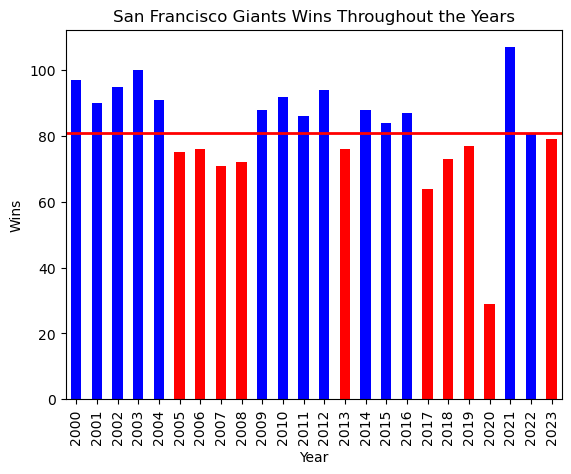

In [8]:
df_2000 = data[data['Tm'] == 'San Francisco Giants']
df_2000.set_index('Year', inplace=True)  # Set 'Year' as the index

colors = ['red' if w < 81 else 'blue' for w in df_2000['W']]


df_2000['W'].plot(kind='bar', color=colors)
plt.axhline(y=81, color='r', linestyle='-', linewidth=2)
plt.title("San Francisco Giants Wins Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.show()

Text(0, 0.5, 'Wins')

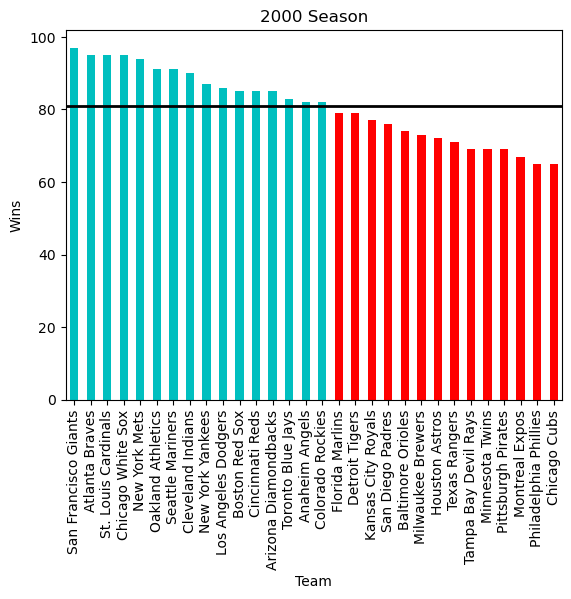

In [9]:

# Filter and set up the data
def time(df1,wantyear):
    return  df1[df1['Year'] == wantyear ]

df_2000 = time(data, 2000)
df_2000.set_index('Tm', inplace=True)

# Define colors based on whether the value is below or above the threshold
colors = ['red' if w < 81 else 'c' for w in df_2000['W']]

# Plot the bar chart with conditional colors
df_2000['W'].plot(kind='bar', color=colors)

# Add the horizontal red line
plt.axhline(y=81, color='k', linestyle='-', linewidth=2)

# Set title and labels
plt.title("2000 Season")
plt.xlabel("Team")
plt.ylabel("Wins")





In [10]:
def filter_by_year(df, year):
    """Filter the DataFrame by the specified year."""
    return df[df['Year'] == year]

def plot_season_wins(year=2000):
    """Plot wins for teams in a specified year."""

    
    # Filter data for the given year
    filtered_df = filter_by_year(data, year)
    
    if filtered_df.empty:
        print(f"No data available for the year {int(year)}.")
        return

    filtered_df = filtered_df.set_index('Tm')

    # Set colors based on wins threshold
    colors = ['red' if w < 81 else 'c' for w in filtered_df['W']]

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    filtered_df['W'].plot(kind='bar', color=colors, ax=ax)

    # Add a horizontal line indicating the threshold of 81 wins
    ax.axhline(y=81, color='k', linestyle='-', linewidth=2)

    # Set title and labels
    ax.set_title(f"{int(year)} Season Wins")
    ax.set_xlabel("Team")
    ax.set_ylabel("Wins")

    # Display the plot
    plt.show()

# Interactive widget for selecting year
interact(plot_season_wins, year=FloatSlider(min=2000, max=2023, step=1, value=2000))


interactive(children=(FloatSlider(value=2000.0, description='year', max=2023.0, min=2000.0, step=1.0), Output(…

<function __main__.plot_season_wins(year=2000)>

In [11]:


# Generate dropdown options from unique teams in 'Tm' column of df2
dropdownselection = list(data['Tm'].unique())

# Create Dropdown widget
w = widgets.Dropdown(
    options=dropdownselection,
    value='Atlanta Braves',  # Default value to display
    description='Select Team:',
)
output = Output()
# Function to filter data by team
def teamse(df1, team):
    return df1[df1['Tm'] == team]

# Plotting function with team parameter
def plot(team='Atlanta Braves'):
    df_2000 = teamse(data, team)
    df_2000.set_index('Year', inplace=True)

    colors = ['red' if w < 81 else 'c' for w in df_2000['W']]
    with output:
        output.clear_output()  # Clear previous output
        df_2000['W'].plot(kind='bar', color=colors)
        plt.axhline(y=81, color='r', linestyle='-', linewidth=2)
        plt.title(f"{team} Wins Throughout the Years")
        plt.xlabel("Year")
        plt.ylabel("Wins")
        plt.show()


# Function to handle dropdown changes and update the plot
def on_change(change):
        plot(change['new'])


# Observe changes in the dropdown widget
w.observe(on_change, names='value')
display(w, output)

# Initial plot display with default team



Dropdown(description='Select Team:', index=1, options=('San Francisco Giants', 'Atlanta Braves', 'St. Louis Ca…

Output()

In [12]:

# Dropdown options
dropdownselection = list(data['Tm'].unique())

# Widgets setup
w = widgets.Dropdown(
    options=dropdownselection,
    value='Atlanta Braves',  # Default value
    description='Select Team:'
)

output = Output()


def teamse(data, selected_team):
    return data[data['Tm'] == selected_team]


def update_plot(selected_team='Atlanta Braves'):
    # Filter data for the selected team
    twinsData = teamse(data, selected_team)
    wins = twinsData["W-L%"]
    years = twinsData["Year"]

    winsList = wins.tolist()
    yearsList = years.tolist()

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim([min(yearsList), max(yearsList)])
    ax.set_ylim([0, 1])
    ax.set_xticks(yearsList)
    ax.tick_params(axis='x', labelsize=8)
    
    scat = ax.scatter([], [], color="black")
    line, = ax.plot([], [], color="black", lw=2)
    fivehundred, = ax.plot([], [], color="red", lw=2)

    ax.set_xlabel('Year')
    ax.set_ylabel('Win Ratio')
    ax.set_title(f'{selected_team} Win Ratios ({min(yearsList)} - {max(yearsList)})')

    # Animation function
    def animate(i):
        scat.set_offsets([[yearsList[i], winsList[i]]])
        line.set_data(yearsList[:i + 1], winsList[:i + 1])
        fivehundred.set_data(yearsList[:i + 1], [0.5] * (i + 1))
        return scat, line, fivehundred

    ani = animation.FuncAnimation(
        fig, animate, repeat=False, frames=len(yearsList), interval=500
    )

    # Clear previous output and display only the HTML animation
    with output:
        output.clear_output(wait=True)
        plt.close(fig)  # Suppress static figure display
        from IPython.display import HTML
        display(HTML(ani.to_jshtml()))


def on_change(change):
    if change['name'] == 'value':  # Detect changes in dropdown selection
        update_plot(change['new'])


# Link dropdown selection to the update_plot function
w.observe(on_change, names='value')

# Initial Display
display(w, output)
update_plot('Atlanta Braves')


Dropdown(description='Select Team:', index=1, options=('San Francisco Giants', 'Atlanta Braves', 'St. Louis Ca…

Output()

In [13]:
data.columns

Index(['Rk', 'Tm', 'W', 'L', 'W-L%', 'R', 'RA', 'Rdiff', 'SOS', 'SRS',
       'pythWL', 'Luck', 'vEast', 'vCent', 'vWest', 'Inter', 'Home', 'Road',
       'ExInn', '1Run', 'vRHP', 'vLHP', '≥.500', '<.500', 'Year'],
      dtype='object')

In [14]:
wanted_columns = np.array([0,2,3,4,5,6,7,8,9,11])


keydata = data.columns[wanted_columns] #1,10,12,13,14,15,16,17,18,19,20,21,22,23,24
keydata.unique()

Index(['Rk', 'W', 'L', 'W-L%', 'R', 'RA', 'Rdiff', 'SOS', 'SRS', 'Luck'], dtype='object')

In [15]:
def teamse(data, selected_team):
    return data[data['Tm'] == selected_team]
dfa = teamse(data, 'Atlanta Braves')
dfa["W-L%"].max()

0.642

In [16]:

dropdownselection1 = list(data['Tm'].unique())
dropdownselection2 = list(keydata.unique()) # Create a second dropdown with same options

# Widgets setup
w1 = widgets.Dropdown(
    options=dropdownselection1,
    value='Atlanta Braves',
    description='Select Team 1:'
)

w2 = widgets.Dropdown(
    options=dropdownselection2,
    value='W-L%', # Different default value
    description='Select Data 2:'
)
hbox = widgets.HBox([w1,w2], layout=widgets.Layout(margin='0px 0px 0px 0px'))  # Adjust margin as needed
output = Output()


def teamse(data, selected_team):
    return data[data['Tm'] == selected_team]




def update_plot(selected_team='Atlanta Braves', keydata = "W-L%"):
    # Filter data for the selected team
    twinsData = teamse(data, selected_team)
    wins = twinsData[keydata]
    years = twinsData["Year"]

    winsList = wins.tolist()
    yearsList = years.tolist()

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim([min(yearsList), max(yearsList)])
    ax.set_ylim([wins.min(), wins.max()])
    ax.set_xticks(yearsList)
    ax.tick_params(axis='x', labelsize=8)
    
    scat = ax.scatter([], [], color="black")
    line, = ax.plot([], [], color="black", lw=2)
    fivehundred, = ax.plot([], [], color="red", lw=2)

    ax.set_xlabel('Year')
    ax.set_ylabel(f'{keydata}')
    ax.set_title(f'{selected_team} {keydata} through out the years ')

    # Animation function
    def animate(i):
        scat.set_offsets([[yearsList[i], winsList[i]]])
        line.set_data(yearsList[:i + 1], winsList[:i + 1])
        fivehundred.set_data(yearsList[:i + 1], [0.5] * (i + 1))
        return scat, line, fivehundred

    ani = animation.FuncAnimation(
        fig, animate, repeat=False, frames=len(yearsList), interval=500
    )

    # Clear previous output and display only the HTML animation
    with output:
        output.clear_output(wait=True)
        plt.close(fig)  # Suppress static figure display
        from IPython.display import HTML
        display(HTML(ani.to_jshtml()))




def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        selected_team = w1.value
        keydata = w2.value
        update_plot(selected_team, keydata)


# Observe changes in both widgets
w1.observe(on_change)
w2.observe(on_change)

# Display widgets and output
hbox = widgets.HBox([w1, w2], layout=widgets.Layout(margin='0px 0px 0px 0px'))
display(hbox, output)

Output()

In [17]:

dropdownselection1 = list(data['Tm'].unique())
dropdownselection2 = list(keydata.unique()) # Create a second dropdown with same options

# Widgets setup
w1 = widgets.Dropdown(
    options=dropdownselection1,
    value='Atlanta Braves',
    description='Select Team 1:'
)

w2 = widgets.Dropdown(
    options=dropdownselection1,
    value='Atlanta Braves', # Different default value
    description='Select Data 2:'
)

w3 = widgets.Dropdown(
    options=dropdownselection2,
    value='W-L%', # Different default value
    description='Select Data 3:'
)


hbox = widgets.HBox([w1,w2,w3], layout=widgets.Layout(margin='0px 0px 0px 0px'))  # Adjust margin as needed
output = Output()


def teamse(data, selected_team):
    return data[data['Tm'] == selected_team]




def update_plot(selected_team='Atlanta Braves', selected_team2='Atlanta Braves', keydata = "W-L%"):
    # Filter data for the selected team
    twinsData = teamse(data, selected_team)
    twinsData2 = teamse(data, selected_team2)


    wins = twinsData[keydata]
    wins2 = twinsData2[keydata]

    years = twinsData["Year"]

    winsList = wins.tolist()
    wins2List = wins2.tolist()

    yearsList = years.tolist()
    
    maxWins = max(winsList)  # Maximum value in winsList
    maxWins2 = max(wins2List)  # Maximum value in yearsList


    minWins = min(winsList)  # Maximum value in winsList
    minWins2 = min(wins2List)  # Maximum value in yearsList

    # Compare the two maximums to find the overall maximum
    overallMax = max(maxWins, maxWins2)
    overallmin = min(minWins, minWins2)
    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim([min(yearsList), max(yearsList)])
    ax.set_ylim([overallmin, overallMax])
    ax.set_xticks(yearsList)
    ax.tick_params(axis='x', labelsize=8)
    
    scat = ax.scatter([], [], color="black")
    scat2 = ax.scatter([], [], color="purple")
    line, = ax.plot([], [], color="black", lw=2)
    line2, = ax.plot([], [], color="purple", lw=2)
    fivehundred, = ax.plot([], [], color="red", lw=2)

    ax.set_xlabel('Year')
    ax.set_ylabel(f'{keydata}')
    ax.set_title(f'{selected_team} v {selected_team2} {keydata} through out the years ')

    # Animation function
    def animate(i):
        scat.set_offsets([[yearsList[i], winsList[i]]])
        scat2.set_offsets([[yearsList[i], wins2List[i]]])

        line.set_data(yearsList[:i + 1], winsList[:i + 1])
        line2.set_data(yearsList[:i + 1], wins2List[:i + 1])

        fivehundred.set_data(yearsList[:i + 1], [0.5] * (i + 1))

        return scat,scat2,line,line2, fivehundred

    ani = animation.FuncAnimation(
        fig, animate, repeat=False, frames=len(yearsList), interval=500
    )

    # Clear previous output and display only the HTML animation
    with output:
        output.clear_output(wait=True)
        plt.close(fig)  # Suppress static figure display
        from IPython.display import HTML
        display(HTML(ani.to_jshtml()))




def on_change(change):
    if change['type'] == 'change' and change['type'] == 'change'  and change['name'] == 'value':
        selected_team = w1.value
        keydata = w2.value
        keydata3= w3.value
        update_plot(selected_team, keydata,keydata3)


# Observe changes in both widgets
w1.observe(on_change)
w2.observe(on_change)
w3.observe(on_change)

# Display widgets and output
hbox = widgets.HBox([w1, w2,w3], layout=widgets.Layout(margin='0px 0px 0px 0px'))
display(hbox, output)

Output()

In [18]:
# Widgets setup
w1 = widgets.Dropdown(
    options=dropdownselection1,
    value='Atlanta Braves',
    description='Select Team 1:'
)

w2 = widgets.Dropdown(
    options=dropdownselection2,
    value='W-L%',
    description='Select Team 1:'
)

w3 = widgets.Dropdown(
    options=dropdownselection2,
    value='W-L%', # Different default value
    description='Select Data 3:'
)


hbox = widgets.HBox([w1,w2,w3], layout=widgets.Layout(margin='0px 0px 0px 0px'))  # Adjust margin as needed
output = Output()


def teamse(data, selected_team):
    return data[data['Tm'] == selected_team]




def update_plot(selected_team='Atlanta Braves', keydata = "W-L%", keydata2 = "W-L%"):
    # Filter data for the selected team
    twinsData = teamse(data, selected_team)
    wins = twinsData[keydata]
    compdata = twinsData[keydata2]
    years = twinsData["Year"]

    winsList = wins.tolist()
    yearsList = years.tolist()
    compdatalist = compdata.tolist()
    maxWins = max(winsList)  # Maximum value in winsList
    maxcompdatalist = max(compdatalist)  # Maximum value in yearsList


    minWins = min(winsList)  # Maximum value in winsList
    mincompdatalist = min(compdatalist)  # Maximum value in yearsList

    # Compare the two maximums to find the overall maximum
    overallMax = max(maxWins, maxcompdatalist)
    overallmin = min(minWins, mincompdatalist)
    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim([min(yearsList), max(yearsList)])
    ax.set_ylim([overallmin, overallMax])
    ax.set_xticks(yearsList)
    ax.tick_params(axis='x', labelsize=8)
    
    scat = ax.scatter([], [], color="black")
    scat2 = ax.scatter([], [], color="purple")
    line, = ax.plot([], [], color="black", lw=2)
    line2, = ax.plot([], [], color="purple", lw=2)
    fivehundred, = ax.plot([], [], color="red", lw=2)

    ax.set_xlabel('Year')
    ax.set_ylabel(f'{keydata}')
    ax.set_title(f'{selected_team} {keydata} & {keydata2} through out the years ')

    # Animation function
    def animate(i):
        scat.set_offsets([[yearsList[i], winsList[i]]])
        scat2.set_offsets([[yearsList[i], compdatalist[i]]])

        line.set_data(yearsList[:i + 1], winsList[:i + 1])
        line2.set_data(yearsList[:i + 1], compdatalist[:i + 1])

        fivehundred.set_data(yearsList[:i + 1], [0.5] * (i + 1))

        return scat,scat2,line,line2, fivehundred

    ani = animation.FuncAnimation(
        fig, animate, repeat=False, frames=len(yearsList), interval=500
    )

    # Clear previous output and display only the HTML animation
    with output:
        output.clear_output(wait=True)
        plt.close(fig)  # Suppress static figure display
        from IPython.display import HTML
        display(HTML(ani.to_jshtml()))




def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value' and change['name'] == 'value':
        selected_team = w1.value
        keydata = w2.value
        keydata3= w3.value
        update_plot(selected_team, keydata,keydata3)


# Observe changes in both widgets
w1.observe(on_change)
w2.observe(on_change)
w3.observe(on_change)

# Display widgets and output
hbox = widgets.HBox([w1, w2,w3], layout=widgets.Layout(margin='0px 0px 0px 0px'))
display(hbox, output)

Output()

In [19]:
teams_and_runs = data[['Tm', 'R']] # Reduce data to teams and their runs

# Find the average runs of every team
average_runs_per_team = teams_and_runs.groupby('Tm', as_index=False)['R'].mean()

team1 = input("List teams to compare (separate teams by commas): ")
team1 = team1.split(', ')
print(team1)

# Ensure proper portion of the data is processed
selectedTeams = average_runs_per_team[average_runs_per_team['Tm'].isin(team1)]

teams = selectedTeams['Tm'].to_numpy()
avgRuns = selectedTeams['R'].to_numpy()
avgRuns = [round(run, 2) for run in avgRuns]

source = pd.DataFrame({"values": avgRuns, "Teams": teams})

# Create Plot
plot = alt.Chart(source).encode(
    alt.Theta("Teams:N").stack(True),
    alt.Radius("values").scale(type="sqrt", zero=True, rangeMin=20),
    color="Teams:N",
)

c1 = plot.mark_arc(innerRadius=40, stroke="#fff")
c2 = plot.mark_text(radiusOffset=20).encode(text="values:Q")

# Title the Chart
chart = (c1 + c2).properties(
    title="Average Runs per Game by Team"                  
)

chart

['']


NameError: name 'alt' is not defined